<a href="https://colab.research.google.com/github/sharmapreksha670/MovieDarshan/blob/main/Customer_Churn_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #as the dataset has categorical features that is why LabelEncoder is used
from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

**2.Data loading and** **understanding**

In [ ]:
#load the csv data to a pandas dataframe
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#dropping customer id column as this is not required for modelling
df=df.drop(columns=['customerID'])

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print(df['gender'].unique())

['Female' 'Male']


In [ ]:
print(df['SeniorCitizen'].unique())

[0 1]


In [ ]:
#printing the unique values in all the categorical columns
numericals_feature_list=['tenure','MonthlyCharges','TotalCharges']

for col in df.columns:
  if col not in numericals_feature_list:
    print(col,df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [ ]:
df.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#changing data type of TotalCharges column

#df["TotalCharges"]=df["TotalCharges"].astype(float) But this won't work in this case as the column has some null (space) values

In [ ]:
#filtering the dataframe
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
len(df[df["TotalCharges"]==" "])

11

In [ ]:
#replacing the null or blank values with 0
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0.0"})

In [ ]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#Checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
#The dataset is imbalanced so the model cannot be trained directly and hence upsampling or downsampling needs to be done to reduce the majority class and increase the minority class

**Insights**
1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalanced identifies in the target

3. Exploratory Data Analysis(EDA)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numericals features analysis**

Understand the distribution of the numerical features

DISTRIBUTION PLOT

In [ ]:
#Plot using seaborn
def plot_histogram(df,column_name):

  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name],kde=True) #kde:kernel density estimation
  plt.title(f"Distribution of {column_name}")
  #calculate mean and median values for the columns

  col_mean=df[column_name].mean()
  col_median=df[column_name].median()

  #add vertical lines for mean and median
  plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
  plt.axvline(col_median,color="green",linestyle="-",label="Median")
  plt.legend()
  plt.show()

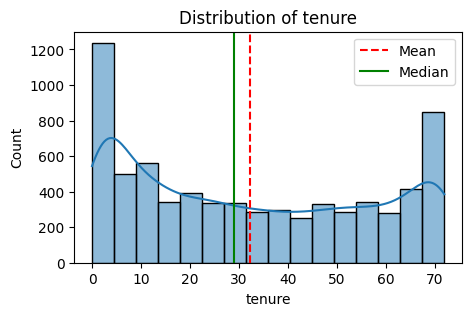

In [ ]:
plot_histogram(df,'tenure')

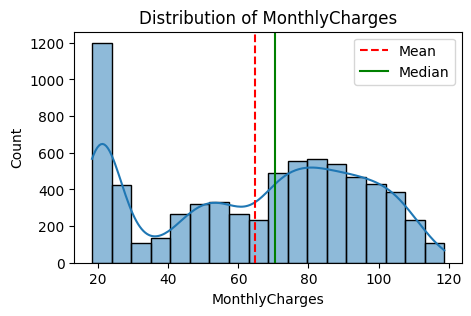

In [ ]:
plot_histogram(df,'MonthlyCharges')

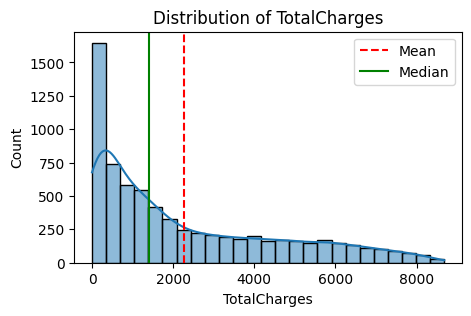

In [ ]:
plot_histogram(df,'TotalCharges') #gives a skewed distribution and models like linear,logistic regression, svm and lasso usually with normal/uniform distribution
#As a result, feature scaling - StandardScaler (Mean=0, S.D.=1) is required.
#But for tree based models, it won't create much of a problem

Box plot for numerical features

In [ ]:
def plot_boxplot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()


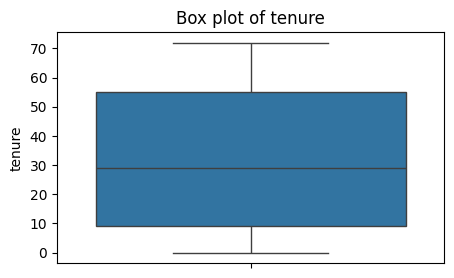

In [ ]:
plot_boxplot(df,'tenure')

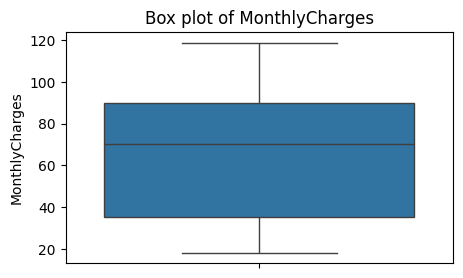

In [ ]:
plot_boxplot(df,'MonthlyCharges')

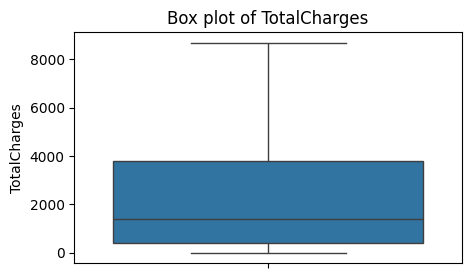

In [ ]:
plot_boxplot(df,'TotalCharges')

Correlation heatmap for numerical columns

<Axes: >

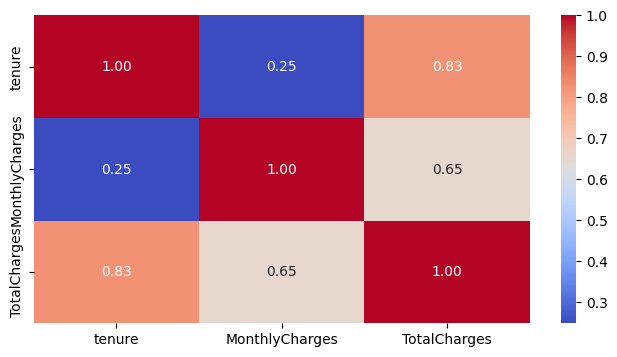

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True, cmap="coolwarm",fmt=".2f")

Categorical features analysis

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Count plot for categorical columns


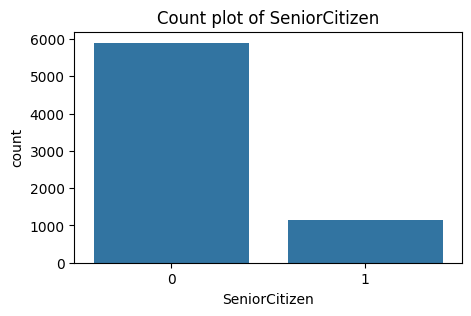

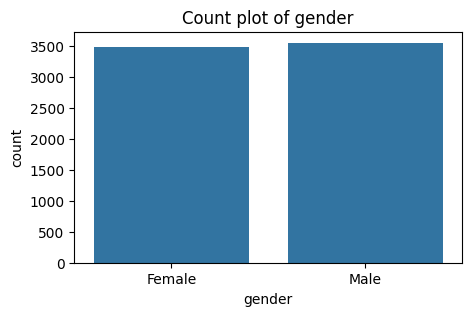

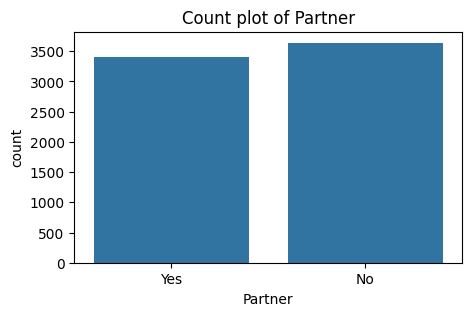

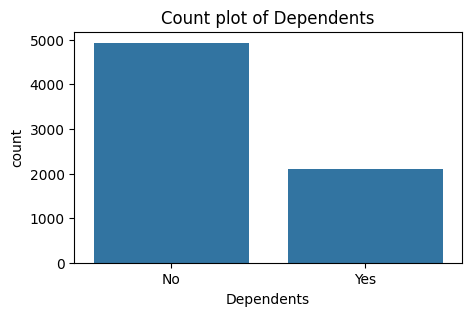

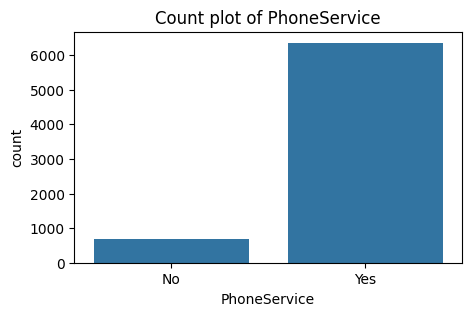

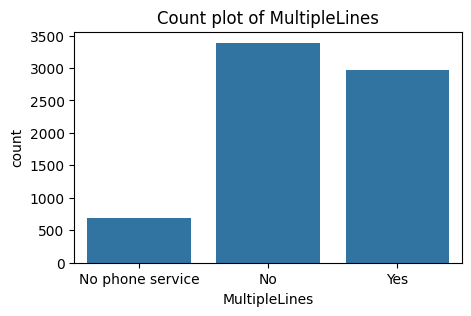

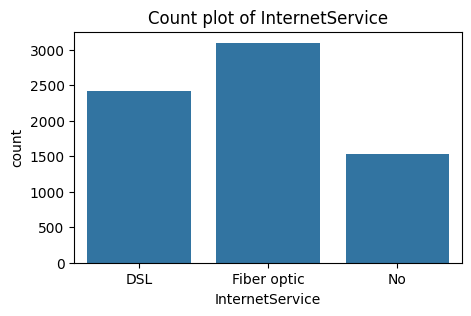

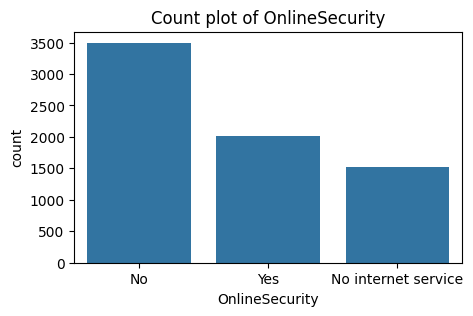

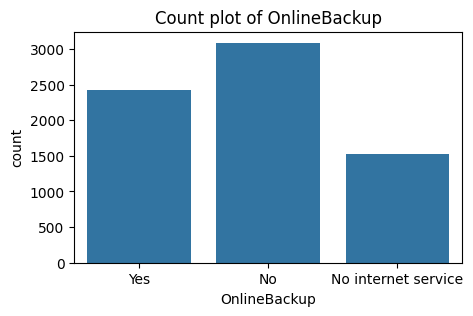

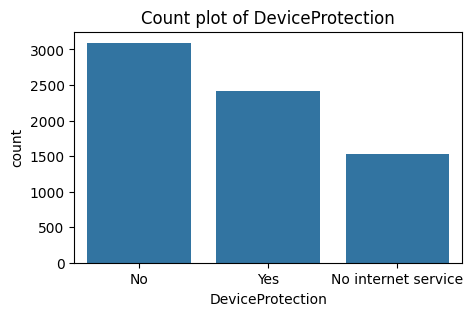

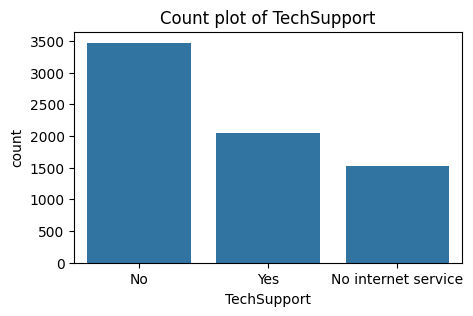

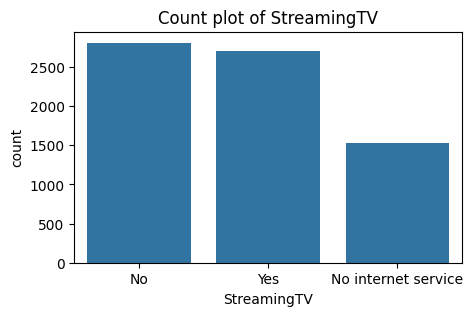

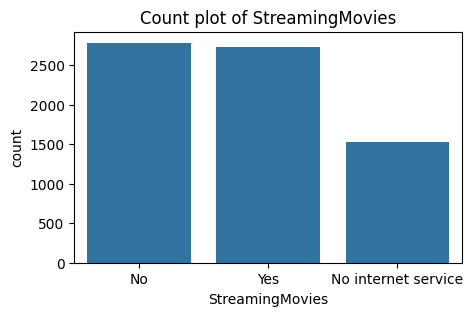

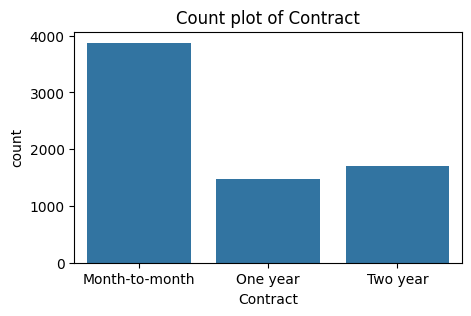

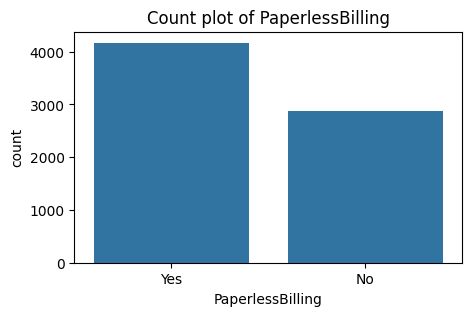

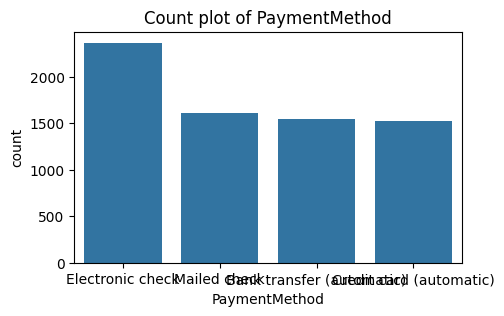

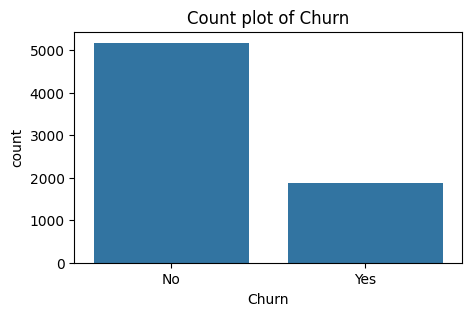

In [ ]:
object_cols=df.select_dtypes(include="object").columns.to_list()
object_cols=["SeniorCitizen"]+object_cols
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"Count plot of {col}")
  plt.show()


Imbalance in the feature category is not as important as the target column

4. Data Preprocessing- Using LabelEncoder to replace 'no' with '0' for example and 'yes' with '1'

Label encoding of target column

In [ ]:
 #Using replace function for churn instead of LabelEncoder
 df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})

/tmp/ipython-input-1623811085.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Label Encoding of categorical features

In [ ]:
#Identifying columns with object data type
object_columns=df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
#Initialize a dictionary to save the encoders
encoders={}

#apply label encoding and store the encoders
for column in object_columns:
  label_encoder=LabelEncoder()
  df[column]=label_encoder.fit_transform(df[column])
  encoders[column]=label_encoder

#save the encoders to a pickle file
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

In [ ]:
print(encoders)

{'gender': LabelEncoder(), 'Partner': LabelEncoder(), 'Dependents': LabelEncoder(), 'PhoneService': LabelEncoder(), 'MultipleLines': LabelEncoder(), 'InternetService': LabelEncoder(), 'OnlineSecurity': LabelEncoder(), 'OnlineBackup': LabelEncoder(), 'DeviceProtection': LabelEncoder(), 'TechSupport': LabelEncoder(), 'StreamingTV': LabelEncoder(), 'StreamingMovies': LabelEncoder(), 'Contract': LabelEncoder(), 'PaperlessBilling': LabelEncoder(), 'PaymentMethod': LabelEncoder()}


In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Train and test data split

In [ ]:
#splitting the features and target
X=df.drop(columns=["Churn"])
y=df["Churn"]

In [ ]:
#split train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(y_train.shape)

(5634,)


In [ ]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Applying SMOTE(Synthetic Minority Oversampling Technique) technique (oversampling technique) to overcome the imbalance

In [ ]:
smote=SMOTE(random_state=42)

In [ ]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train) #purpose is to get an even distribution of 0s and 1s


In [ ]:
print(y_train_smote.shape)

(8276,)


In [ ]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


5. Model training

Training with default hyperparameters

In [ ]:
#dictionary of models
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

In [ ]:
#dictionary to store the cross-validation results
cv_scores={}

#perform 5-fold cross validation for each model
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters")
  scores=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

Random Forest gives the highest accuracy compared to other models with default parameters

In [ ]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

6.Model Evaluation

In [ ]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [ ]:
#evaluate on test data
y_test_pred=rfc.predict(X_test)
print("Accuracy score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification report:\n",classification_report(y_test,y_test_pred))

#if there are any sorts of imbalance in the data, then we should focus on the recall,precision,etc instead of accuracy_score

Accuracy score:
 0.7785663591199432
Confusion matrix:
 [[878 158]
 [154 219]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
X.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
#save the trained model as a pickle file
model_data={"model":rfc,"feature_names":X.columns.tolist()}

with open("customer_churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)

7. Load the saved model and build a Predictive system

In [ ]:
#load the saved model and the feature names

with open("customer_churn_model.pkl","rb") as f:
  model_data=pickle.load(f)

loaded_model=model_data["model"]
feature_names=model_data["feature_names"]


In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data_df=pd.DataFrame([input_data])

with open("encoders.pkl","rb") as f:
  encoders=pickle.load(f)

#print(input_data_df.head())

#encode categorical features using the saved encoders
for column,encoder in encoders.items():
  input_data_df[column]=encoder.transform(input_data_df[column])

# make a prediction
prediction=loaded_model.predict(input_data_df)
pred_prob=loaded_model.predict_proba(input_data_df)
print(prediction)

#results
print(f"Prediction: {'Churn' if prediction[0]==1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediction Probability: [[0.78 0.22]]


In [ ]:
input_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

**To do:**
1. Implement hyperparameter tuning
2. Try model selection
3. Try downsampling
4. Try to address the overfitting
5. Try Starified k fold CV